# Parte 1
Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 70:30 respectivamente estratificado por la LluviaMan. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función set.seed(2023).

### Carga de archivo y configuraciones iniciales

In [2]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar base de datos lluvia_full.csv
df = pd.read_csv('data/lluvia_full.csv', sep=',')

In [5]:
df.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [7]:
#Verificar si hay datos faltantes
print(df.isnull().sum())

MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
VelRafaga      0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pre3pm         0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
Koppen         0
Estacion       0
dtype: int64


In [8]:
# Información de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

### Transformación de valores en variable LluviaMan

In [9]:
# Codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente
df["LluviaMan"].replace(["No","Yes"], [0, 1], inplace = True)
df['LluviaMan'].value_counts()

LluviaMan
0    43993
1    12427
Name: count, dtype: int64

In [10]:
# Información de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int64  
 18  Koppen       56420 non-null  object 
 19  Esta

### Sepación de base de datos

In [11]:
# Separar datos estratificads por la variable LluviaMan

from sklearn.model_selection import train_test_split

df_y = df["LluviaMan"]
df_X = df.copy()
df_X.drop(["LluviaMan"], axis = "columns", inplace =  True)

In [12]:
# Dataframe df_y
df_y.head()

0    0
1    0
2    0
3    1
4    0
Name: LluviaMan, dtype: int64

In [13]:
# Dataframe df_X
df_X.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,Temperate,Invierno


In [14]:
# Separo en 70% entrenamiento y 30% testeo con una semilla 2023

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size = 0.7, random_state = 2023, stratify = df_y)

# Parte 2
Utilizando el set de entrenamiento, ajuste un modelo de regresión logística, SVM, árbol de clasificación y Random Forest. Para ello debe:


#### 1. Limpiar los datos - Escalar los datos numéricos. - Transformar a dummys las variables categóricas.

In [26]:
# Identificar variables numércicas y categóricas en base de entrenamiento
categoricas_train = X_train.columns[X_train.dtypes=='object']
numericas_train = X_train.columns[X_train.dtypes!='object']
print("Variables categóricas: ",categoricas)
print("Variables numéricas: ",numericas)

Variables categóricas:  Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')
Variables numéricas:  Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


In [27]:
# Identificar variables numércicas y categóricas en base de testeo
categoricas_test = X_test.columns[X_test.dtypes=='object']
numericas_test = X_test.columns[X_test.dtypes!='object']
print("Variables categóricas: ",categoricas)
print("Variables numéricas: ",numericas)

Variables categóricas:  Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')
Variables numéricas:  Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Instanciamos OneHotEncoder y StandardScaler
ohe = OneHotEncoder()
scaler = StandardScaler()

#Creamos transformación de Train
transformer_train = make_column_transformer(
    (ohe, categoricas_train),
    (scaler, numericas_train),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)
# Ajustamos y transformamos
transformer_train.fit(X_train)

#Creamos transformación de Test
transformer_test = make_column_transformer(
    (ohe, categoricas_test),
    (scaler, numericas_test),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)
# Ajustamos y transformamos
transformer_test.fit(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')),
                                ('standardscaler', StandardScaler(),
                                 Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [32]:
# Obtener los nombres de las variables de entrenamiento
transformer_train.get_feature_names_out()

# Obtener los nombres de las variables de testeo
transformer_test.get_feature_names_out()

array(['LluviaHoy_No', 'LluviaHoy_Yes', 'Koppen_Desert',
       'Koppen_Grassland', 'Koppen_Subtropical', 'Koppen_Temperate',
       'Estacion_Invierno', 'Estacion_Otoño', 'Estacion_Primavera',
       'Estacion_Verano', 'MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion',
       'Sol', 'VelRafaga', 'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm',
       'Pres9am', 'Pre3pm', 'Nub9am', 'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype=object)

In [33]:
# Reunimos datos y nombres de columna de entrenamiento
X_train = pd.DataFrame(
    data = transformer_train.transform(X_train),
    columns= transformer_train.get_feature_names_out()
)
display(X_train.head())

,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,0.532116,-0.532116,-0.178386,-0.307510,1.331273,-1.045125,-0.575109,-0.586375,1.716347,-0.565284,...,-0.801647,1.787281,-0.154067,0.021209,0.183075,-0.041824,-1.156446,-0.117843,0.713276,0.495574
1,0.532116,-0.532116,-0.178386,-0.307510,-0.751161,0.956823,-0.575109,-0.586375,1.716347,-0.565284,...,-1.043211,1.317494,-2.154512,1.308101,-0.134811,0.016322,-0.083906,0.637754,0.242551,-1.185454
2,0.532116,-0.532116,-0.178386,-0.307510,1.331273,-1.045125,-0.575109,-0.586375,1.716347,-0.565284,...,1.251648,-1.031440,0.494726,1.159613,-0.149260,-0.405240,0.988634,1.393352,0.364028,0.071662
3,0.532116,-0.532116,-0.178386,3.251927,-0.751161,-1.045125,1.738802,-0.586375,-0.582633,-0.565284,...,0.526956,0.260474,-0.045934,-0.275766,1.078933,0.917593,0.631120,1.015553,-0.759637,-0.571513
4,0.532116,-0.532116,-0.178386,-0.307510,-0.751161,0.956823,-0.575109,1.705392,-0.582633,-0.565284,...,-1.647121,-1.266333,0.765057,-0.424254,0.862193,0.757690,-1.156446,-1.251240,-1.488502,-0.264543


In [35]:
# Reunimos datos y nombres de columna de testeo
X_test = pd.DataFrame(
    data = transformer_test.transform(X_test),
    columns= transformer_test.get_feature_names_out()
)
display(X_test.head())

,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.983230,0.494425,-0.535291,-1.024401,-0.647251,-0.717227,-1.164776,-1.646956,1.070959,1.668422
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.507237,0.023827,-0.804787,-0.380221,-0.022479,0.202309,-1.164776,-0.891570,0.258891,0.291294
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.507237,0.259126,0.057599,0.412617,0.079229,0.625587,-0.449765,0.619201,-0.200770,-0.221466
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.801744,-0.564419,0.111499,-0.528878,1.997134,1.837040,-1.164776,-1.269263,-0.614465,-0.133565
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.150242,0.965022,0.488793,0.462170,0.849297,0.932099,-1.164776,-0.513877,-1.120092,-1.305588


#### Regresión Logística

In [38]:
# Cargamos las library para las métricas y ca curva roc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

In [48]:
# Función de resultados
def mostrar_resultados(y_test, y_pred,X_test,modelo):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Matriz de confusion")
    plt.ylabel("Valores reales")
    plt.xlabel("Predicciones")
    plt.show()
    fig, ax = plt.subplots(figsize=(8,6))
    RocCurveDisplay.from_estimator(
        estimator = modelo,
        X = X_test,
        y = y_test,
        ax= ax
    )
    ax.plot([0,1],ls='--')
    ax.set_title("ROC")
    print(f'Reporte de clasificación:\n{classification_report(y_test,y_pred)}')

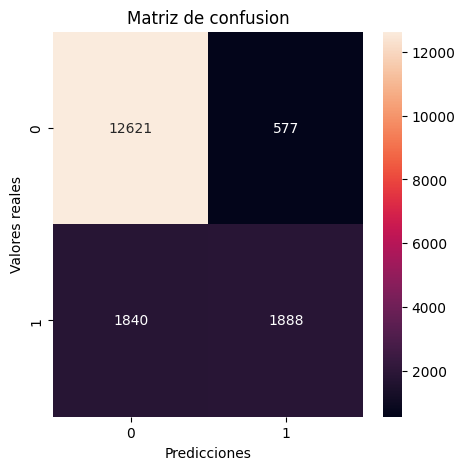

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13198
           1       0.77      0.51      0.61      3728

    accuracy                           0.86     16926
   macro avg       0.82      0.73      0.76     16926
weighted avg       0.85      0.86      0.85     16926



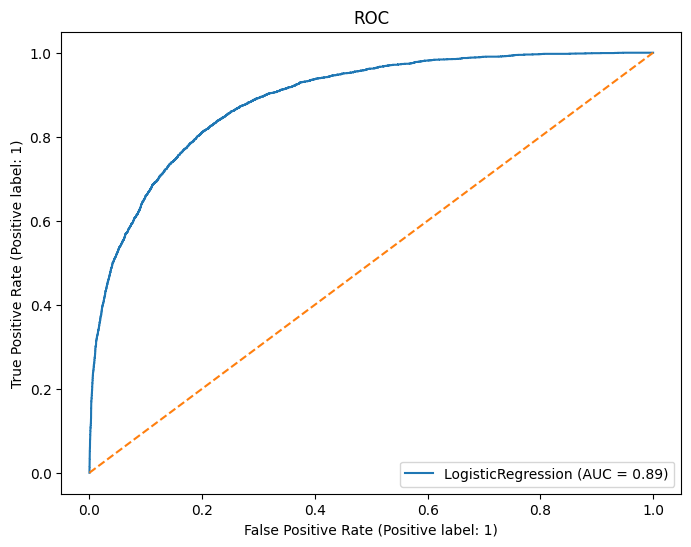

In [49]:
# Regresión logística
from sklearn.linear_model import LogisticRegression
modlog = LogisticRegression()
modlog.fit(X_train,y_train)
y_predlog = modlog.predict(X_test)
mostrar_resultados(y_test, y_predlog,X_test,modlog)

In [50]:
# Área bajo la curva en regresión logística
from sklearn.metrics import roc_auc_score
y_problog = modlog.predict_proba(X_test)[:,1]
print("Area bajo la curva: ", roc_auc_score(y_test,y_problog))

Area bajo la curva:  0.8897444387789281


#### 2. Definir la grilla de hiperparámetros a optimizar, en este caso:

$SVM$


Costo

$Árbol de clasificación:$


Observaciones mínimas para división.

Costo de complejidad.

Profundidad máxima del árbol.

$Random Forest$

Número de árboles.

Número de predictores muestreados para cada árbol.

Observaciones mínimas para división.

#### 3. Buscar los hiperparámetros óptimos utilizando validación cruzada optimizando la métrica de roc_auc

#### SVM

In [52]:
# Importar librerías de SVM
from sklearn.svm import SVC 
from mlxtend.plotting import plot_decision_regions

svm = SVC(random_state=2023)
svm.fit(X_train,y_train)

SVC(random_state=2023)

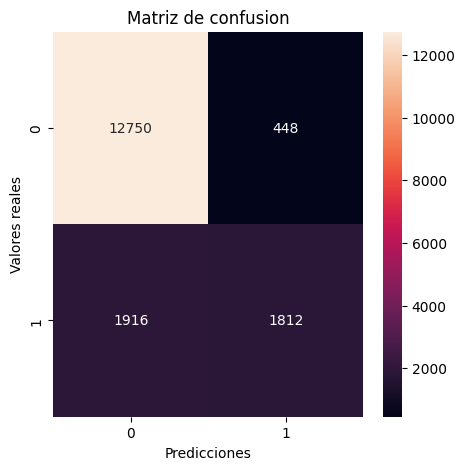

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     13198
           1       0.80      0.49      0.61      3728

    accuracy                           0.86     16926
   macro avg       0.84      0.73      0.76     16926
weighted avg       0.85      0.86      0.85     16926



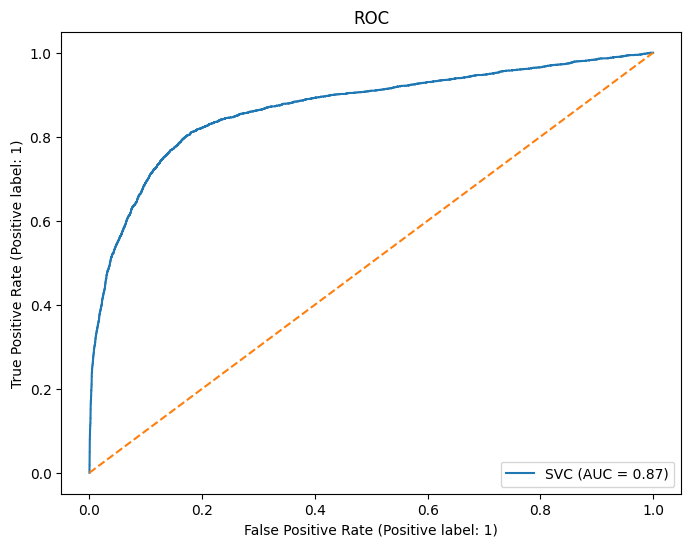

In [53]:
# Mostrar los resultados de SVM
y_predsvm = svm.predict(X_test)
mostrar_resultados(y_test, y_predsvm, X_test, svm)

In [54]:
# Importar library para optimizar hiperparámetros

from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Definición de hiperparámetros y configuración 

hiperparametros = {"kernel" : ["rbf", "linear", "poly"],
                   "C": np.logspace(-4,1,15)}

configuraciones = KFold(n_splits = 5, shuffle=True, random_state=2023)
modelo = SVC(random_state=2023)

# Optimización de hiperparámetros
modelos = GridSearchCV(
    estimator = modelo,
    param_grid= hiperparametros, 
    cv = configuraciones,  
    scoring = 'roc_auc', 
    n_jobs = -1 ,   
    verbose = 1  
)
modelos.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.27584593e-04, 5.17947468e-04, 1.17876863e-03,
       2.68269580e-03, 6.10540230e-03, 1.38949549e-02, 3.16227766e-02,
       7.19685673e-02, 1.63789371e-01, 3.72759372e-01, 8.48342898e-01,
       1.93069773e+00, 4.39397056e+00, 1.00000000e+01]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='roc_auc', verbose=1)

In [55]:
# Mejores parámetros para SVM
print(modelos.best_params_)

{'C': 0.013894954943731374, 'kernel': 'linear'}


In [56]:
# Resultados con mejores parámetros
svm2 = modelos.best_estimator_.fit(X_train, y_train)

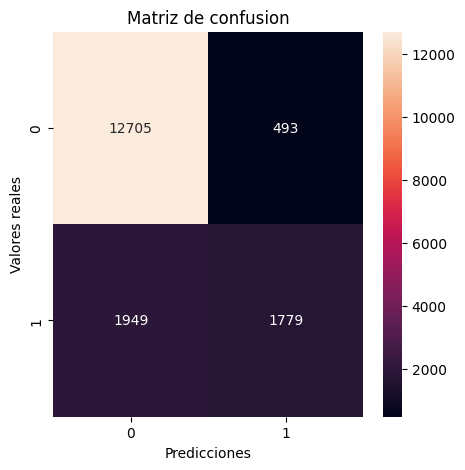

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13198
           1       0.78      0.48      0.59      3728

    accuracy                           0.86     16926
   macro avg       0.83      0.72      0.75     16926
weighted avg       0.85      0.86      0.84     16926



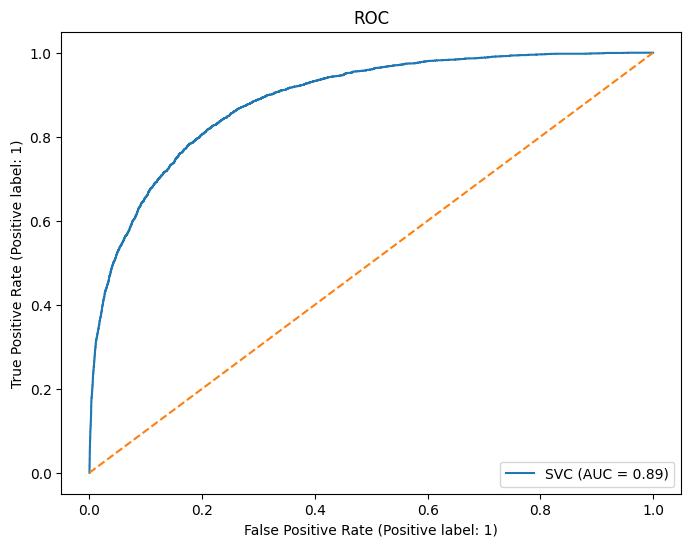

In [57]:
# Mostrar los resultados de SVM2

y_predsvm2 = svm2.predict(X_test)
mostrar_resultados(y_test,y_predsvm2,X_test, svm2)

# Parte 3

Compare los modelos ajustados utilizando el set de test, bajo el criterio de f1-score, ¿cuál es el mejor modelo en su caso?